In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df = pd.read_csv(r'..\data\Heart_Disease_Prediction.csv')
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
label=df["Heart Disease"]
df.drop("Heart Disease",axis=1,inplace=True)
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


<AxesSubplot:>

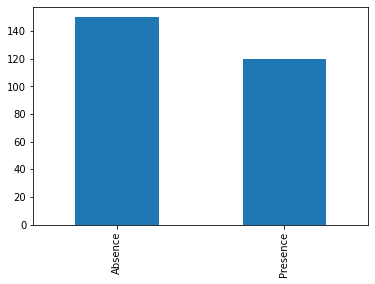

In [6]:
label.value_counts().plot(kind="bar")

In [6]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
dtype: object

In [7]:
categorical_features=["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]
df[categorical_features]=df[categorical_features].astype("category")

In [8]:
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [9]:
df.dtypes

Age                           int64
Sex                        category
Chest pain type            category
BP                            int64
Cholesterol                   int64
FBS over 120               category
EKG results                category
Max HR                        int64
Exercise angina            category
ST depression               float64
Slope of ST                category
Number of vessels fluro    category
Thallium                   category
dtype: object

In [10]:
continuous_features=set(df.columns)-set(categorical_features)
scaler = StandardScaler()
df_norm = df.copy()
df_norm[list(continuous_features)]=scaler.fit_transform(df[list(continuous_features)])
# #df_norm=pd.DataFrame(df_norm,columns=list(continuous_features))
df_norm

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3,2.280369,-0.981951,1,0,0.532904,0,-0.481153,1,0,7
266,-1.147506,1,2,-0.636310,0.258589,0,0,1.008625,0,-0.918565,1,0,7
267,0.172309,0,2,0.485490,0.859476,0,2,0.143677,0,0.218706,2,0,3
268,0.282294,1,4,0.485490,-1.117635,0,0,-0.072560,0,-0.568636,2,0,6


In [11]:
# Tạo ra biến chỉ số cho mỗi thành phần thuộc tính không liên tục
df_norm_dummies=pd.get_dummies(df_norm)
df_norm_dummies

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,2.280369,-0.981951,0.532904,-0.481153,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
266,-1.147506,-0.636310,0.258589,1.008625,-0.918565,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
267,0.172309,0.485490,0.859476,0.143677,0.218706,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
268,0.282294,0.485490,-1.117635,-0.072560,-0.568636,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [12]:
import pickle

with open('heart/X.pkl', 'wb') as f:
    pickle.dump(df_norm_dummies, f)

with open('heart/y.pkl', 'wb') as f:
    pickle.dump(label, f)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df_norm_dummies, label, test_size=0.15, stratify=label, random_state=10)

In [13]:
print('Độ dài tập train: ', len(X_train))
print('Độ dài tập nhãn train: ', len(y_train))

Độ dài tập train:  229
Độ dài tập nhãn train:  229


SVC()


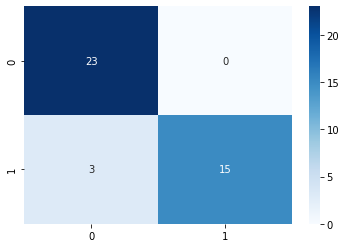

              precision    recall  f1-score   support

     Absence       0.88      1.00      0.94        23
    Presence       1.00      0.83      0.91        18

    accuracy                           0.93        41
   macro avg       0.94      0.92      0.92        41
weighted avg       0.94      0.93      0.93        41

LogisticRegression()


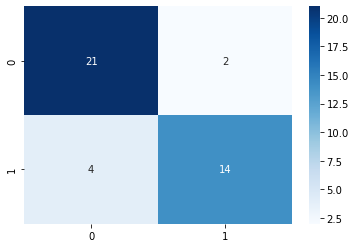

              precision    recall  f1-score   support

     Absence       0.84      0.91      0.87        23
    Presence       0.88      0.78      0.82        18

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41

GaussianNB()


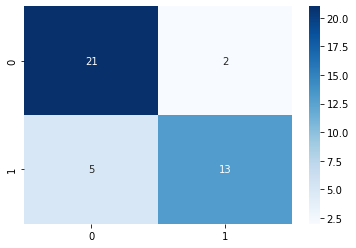

              precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        23
    Presence       0.87      0.72      0.79        18

    accuracy                           0.83        41
   macro avg       0.84      0.82      0.82        41
weighted avg       0.83      0.83      0.83        41

DecisionTreeClassifier()


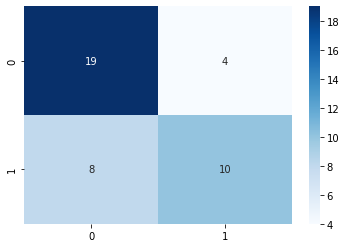

              precision    recall  f1-score   support

     Absence       0.70      0.83      0.76        23
    Presence       0.71      0.56      0.63        18

    accuracy                           0.71        41
   macro avg       0.71      0.69      0.69        41
weighted avg       0.71      0.71      0.70        41



In [17]:
# Ở đây sử dụng 4 mô hình để dự đoán bệnh:
# + Mô hình SVM
# + Mô hình hồi quy logistic
# + Mô hình naive bayes sử dụng phân phối Gaussian
# + Mô hình cây quyết định
models = [SVC(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier()]

for model in models:
    print(model)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, y_pred))

<AxesSubplot:>

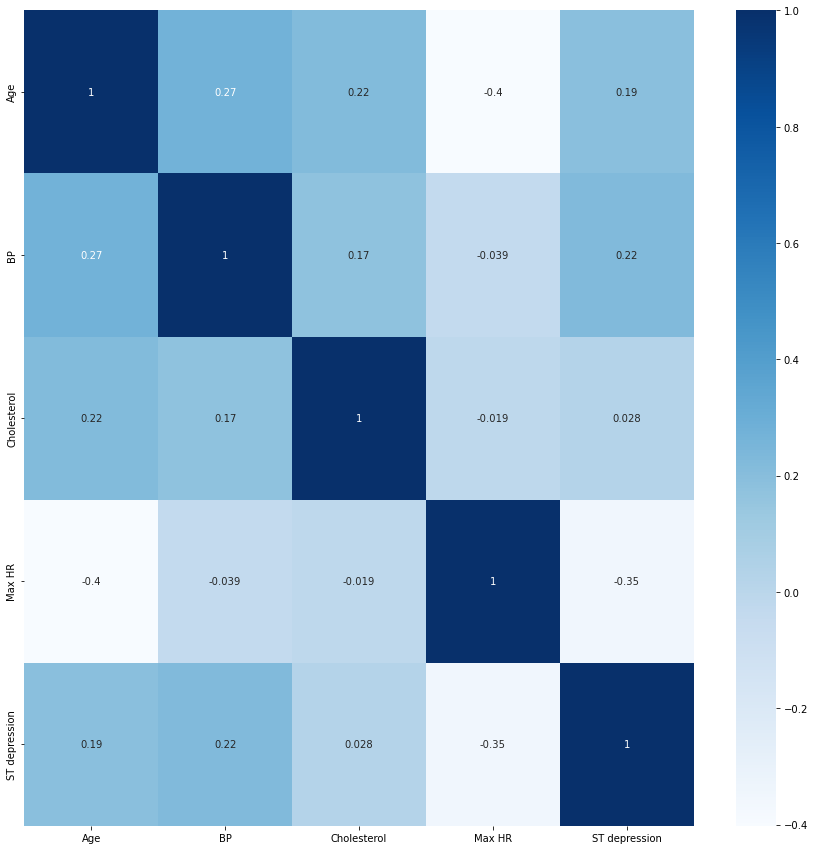

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df_norm.corr(),cmap=plt.cm.Blues,annot=True)

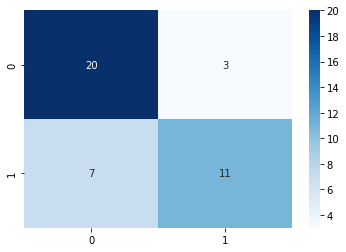

              precision    recall  f1-score   support

     Absence       0.74      0.87      0.80        23
    Presence       0.79      0.61      0.69        18

    accuracy                           0.76        41
   macro avg       0.76      0.74      0.74        41
weighted avg       0.76      0.76      0.75        41



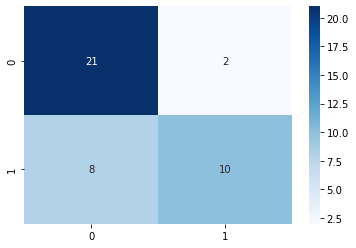

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



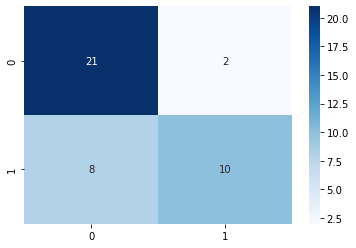

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



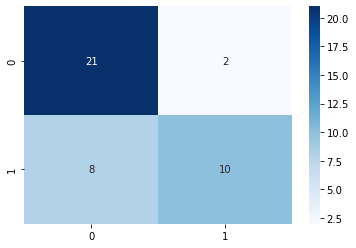

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



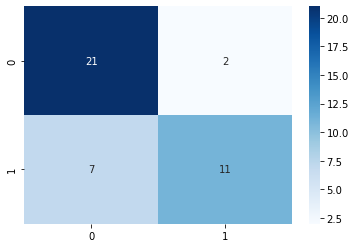

              precision    recall  f1-score   support

     Absence       0.75      0.91      0.82        23
    Presence       0.85      0.61      0.71        18

    accuracy                           0.78        41
   macro avg       0.80      0.76      0.77        41
weighted avg       0.79      0.78      0.77        41



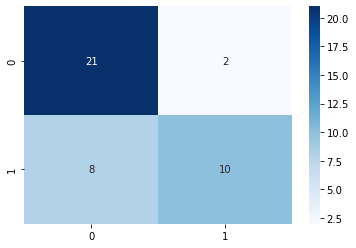

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



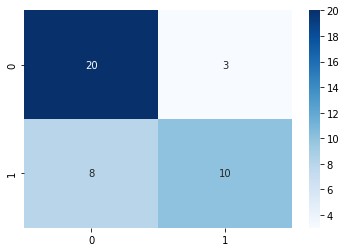

              precision    recall  f1-score   support

     Absence       0.71      0.87      0.78        23
    Presence       0.77      0.56      0.65        18

    accuracy                           0.73        41
   macro avg       0.74      0.71      0.71        41
weighted avg       0.74      0.73      0.72        41



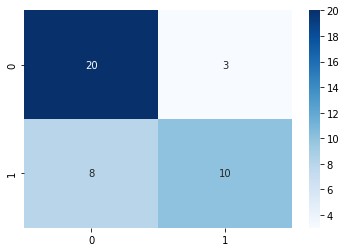

              precision    recall  f1-score   support

     Absence       0.71      0.87      0.78        23
    Presence       0.77      0.56      0.65        18

    accuracy                           0.73        41
   macro avg       0.74      0.71      0.71        41
weighted avg       0.74      0.73      0.72        41



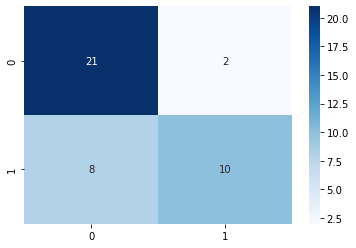

              precision    recall  f1-score   support

     Absence       0.72      0.91      0.81        23
    Presence       0.83      0.56      0.67        18

    accuracy                           0.76        41
   macro avg       0.78      0.73      0.74        41
weighted avg       0.77      0.76      0.75        41



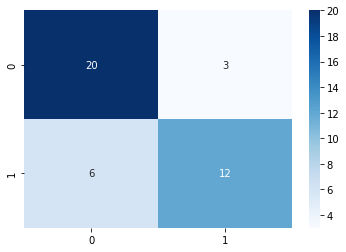

              precision    recall  f1-score   support

     Absence       0.77      0.87      0.82        23
    Presence       0.80      0.67      0.73        18

    accuracy                           0.78        41
   macro avg       0.78      0.77      0.77        41
weighted avg       0.78      0.78      0.78        41



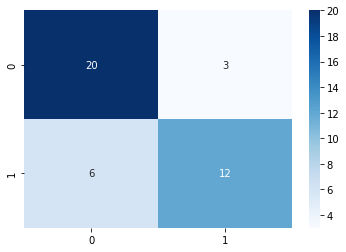

              precision    recall  f1-score   support

     Absence       0.77      0.87      0.82        23
    Presence       0.80      0.67      0.73        18

    accuracy                           0.78        41
   macro avg       0.78      0.77      0.77        41
weighted avg       0.78      0.78      0.78        41



In [21]:
n_dimensions=[i for i in range(2,len(df.columns))]

for dim in n_dimensions:
    pca = PCA(dim)
    df_norm_reduc=pd.DataFrame(pca.fit_transform(df_norm), columns=[i for i in range(dim)])
    
    X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df_norm_reduc), label, test_size = 0.15, stratify = label, random_state = 10)
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, y_pred))